<a href="https://colab.research.google.com/github/MatheusSilva014/Projeto-de-classifica-o/blob/main/C%C3%B3pia_de_Ponto_de_partida_Unidade_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 99% 112M/113M [00:01<00:00, 85.7MB/s] 
100% 113M/113M [00:01<00:00, 71.9MB/s]


In [ ]:
print(files_in_photos)
print(len(files_in_photos))

['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'f1-013-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'm1-014-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm1-002-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-082-01.jpg', 'm-096-01.jpg', 'm1-031-01.jpg', 'm-058-01.jpg', 'f-027-01.jpg', 'm1-006-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-036-01.jpg', 'm-089-01.jpg', 'm1-034-01.jpg', 'f-011-01.jpg', 'm1-0

In [ ]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Função para carregar e pré-processar as imagens
def load_and_preprocess_images(image_folder, target_size=(250, 200)):
    images = []
    labels = []
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)

        # Carregar a imagem
        img = cv2.imread(img_path)

        if img is not None:
            # Redimensionar para o tamanho desejado
            img_resized = cv2.resize(img, target_size)
            img_normalized = img_resized / 255.0  # Normalizar as imagens para [0, 1]

            # Adicionar a imagem à lista
            images.append(img_normalized)

            # Atribuir o rótulo (0 para masculino, 1 para feminino)
            label = 0 if 'm' in filename else 1
            labels.append(label)

    return np.array(images), np.array(labels)

# Carregar e pré-processar as imagens
images, labels = load_and_preprocess_images('photos')

# Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.5, random_state=23)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=23)

print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")


Training set: 94 images
Validation set: 56 images
Test set: 38 images


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Definir o modelo CNN
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Camada Convulucional 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Camada Convulucional 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Camada Convulucional 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Achatar as saídas
    model.add(layers.Flatten())

    # Camada densa
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Regularização com Dropout

    # Camada de saída
    model.add(layers.Dense(1, activation='sigmoid'))  # Saída binária: masculino (0) ou feminino (1)

    return model

# Criar o modelo
model = create_cnn_model((250, 200, 3))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 99, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 97, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 85376)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,928,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,021,633 (42.04 MB)

 Trainable params: 11,021,633 (42.04 MB)

 Non-trainable params: 0 (0.00 B)

Modelo CNN para Classificação Binária (Masculino/Feminino)

Camadas Convolucionais (Conv2D):

Responsáveis por extrair características importantes das imagens, como formas, bordas e texturas. Usam filtros para percorrer as imagens.
MaxPooling (MaxPooling2D):

Reduz a dimensionalidade das imagens, mantendo apenas as características mais relevantes. Ajuda a reduzir o custo computacional e evita overfitting.
Flatten:

Achata a saída das camadas convolucionais (matriz 2D) em um vetor 1D para ser passado para as camadas densas.
Camada Densa (Dense):

Camada totalmente conectada que combina as características extraídas para realizar a classificação. Usa a função ReLU para introduzir não linearidade.
Regularização com Dropout:

Durante o treinamento, 50% das conexões são desativadas aleatoriamente para evitar que o modelo memorize os dados e melhore a generalização.
Camada de Saída:

Usando uma função sigmoid, a rede faz uma previsão binária: "Masculino" (0) ou "Feminino" (1).
Compilação:

O modelo é compilado com o otimizador Adam e a função de perda binary_crossentropy, que é adequada para tarefas de classificação binária.

In [ ]:
# Treinamento do modelo
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.4439 - loss: 2.0497 - val_accuracy: 0.9107 - val_loss: 0.6336
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.6015 - loss: 0.7055 - val_accuracy: 0.7321 - val_loss: 0.5420
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.7168 - loss: 0.5577 - val_accuracy: 0.7321 - val_loss: 0.5139
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.7136 - loss: 0.6061 - val_accuracy: 0.7321 - val_loss: 0.4713
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.7537 - loss: 0.5068 - val_accuracy: 0.7857 - val_loss: 0.4237
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8144 - loss: 0.5095 - val_accuracy: 0.9107 - val_loss: 0.3874
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8460 - loss: 0.4188 - val_accuracy: 0.9107 - val_loss: 0.3003
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8907 - loss: 0.3421 - val_accuracy: 0.9286 - val_loss: 0.3161
Epoch 9/

X_train, y_train:

X_train: São as imagens de entrada para o treinamento do modelo. Estas imagens devem estar já pré-processadas e organizadas em um formato numérico que o modelo possa entender.
y_train: São os rótulos correspondentes às imagens de treino. No seu caso, 0 para "masculino" e 1 para "feminino", ou outro formato binário, dependendo do seu dataset.
epochs=10:

Define o número de vezes que o modelo verá todo o conjunto de dados de treinamento. Em outras palavras, o modelo será treinado em todo o dataset 10 vezes. O número de épocas pode ser ajustado para melhorar o desempenho ou acelerar o treinamento, dependendo do tamanho do dataset e do tempo disponível.
batch_size=32:

O batch size define quantas imagens serão usadas em cada "lote" de treinamento antes de atualizar os pesos do modelo. Isso ajuda na eficiência do treinamento. Tamanhos de lote maiores podem acelerar o treinamento, mas exigem mais memória.
validation_data=(X_val, y_val):

Durante o treinamento, o modelo irá também avaliar sua performance em um conjunto de dados de validação. Estes dados não são usados para o treinamento, mas servem para verificar o desempenho do modelo em dados que ele não viu durante o treinamento.
X_val são as imagens de validação e y_val são seus rótulos.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.60      0.75        10

    accuracy                           0.89        38
   macro avg       0.94      0.80      0.84        38
weighted avg       0.91      0.89      0.89        38



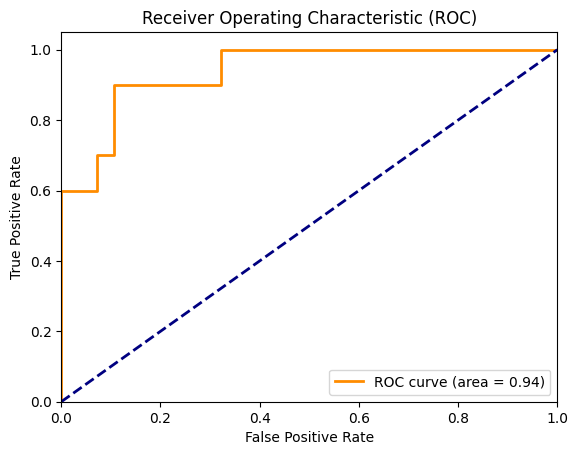

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Avaliar o modelo no conjunto de testes
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Gerar o relatório de classificação
print(classification_report(y_test, y_pred_binary))

# Calcular a curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Predições e Conversão em Classes Binárias: O modelo faz previsões para o conjunto de dados de teste, gerando uma probabilidade entre 0 e 1 para cada imagem (quanto mais perto de 1, maior a probabilidade de a imagem ser classificada como feminina). Em seguida, essas probabilidades são convertidas em classes binárias (masculino ou feminino) com base em um limite de 0,5.

Relatório de Classificação: Através do relatório de classificação, o código apresenta métricas como:

Precisão: Proporção de predições corretas entre as que o modelo classificou como positivas.
Revocação: Proporção de predições positivas corretas entre todas as reais instâncias positivas.
F1-score: Uma média harmônica entre precisão e revocação, que ajuda a entender o equilíbrio entre elas.
Essas métricas são apresentadas para cada classe (masculino e feminino), dando uma visão clara de como o modelo está se comportando.
Curva ROC e AUC: A curva ROC ajuda a visualizar a taxa de falsos positivos (falsas classificações de feminino como masculino) contra a taxa de verdadeiros positivos (corretas classificações de feminino como feminino). A AUC (Área Sob a Curva) é uma medida que quantifica o desempenho do modelo. Um valor AUC mais próximo de 1 significa que o modelo tem um desempenho excelente na separação das classes (masculino e feminino).

Gráfico da Curva ROC: O gráfico da curva ROC mostra a relação entre a taxa de falsos positivos e a taxa de verdadeiros positivos para diferentes limiares de decisão. O modelo ideal ficaria o mais à esquerda possível (menor FPR) e o mais alto possível (maior TPR), o que indicaria um desempenho excelente.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized / 255.0  # Normalizar para [0, 1]
    return np.expand_dims(img_normalized, axis=0)  # Adiciona uma dimensão extra para batch

def classify_images(model, image_paths):
    """Classifica uma lista de imagens e exibe os resultados."""
    for image_path in image_paths:
        # Pré-processar a imagem
        img = load_and_preprocess_image(image_path)

        # Fazer a previsão
        prediction = model.predict(img)
        label = 'Feminino' if prediction > 0.5 else 'Masculino'

        # Mostrar a imagem e a previsão
        img_display = cv2.imread(image_path)
        img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)  # Converter para RGB para exibição
        plt.imshow(img_display)
        plt.title(f"Classificação: {label} (Probabilidade: {prediction[0][0]:.2f})")
        plt.axis('off')
        plt.show()


Carregar e Pré-processar Imagens:

A função load_and_preprocess_image carrega uma imagem a partir do caminho fornecido (image_path), redimensiona a imagem para o tamanho especificado (250x200 por padrão) e normaliza os valores dos pixels para o intervalo [0, 1] dividindo os valores por 255.
Em seguida, a imagem é expandida com uma dimensão extra para simular um "batch", pois a maioria dos modelos de redes neurais espera entradas em lotes, mesmo que seja um único item.
Classificação das Imagens:

A função classify_images recebe um modelo de rede neural e uma lista de caminhos de imagens.
Para cada imagem, a função faz a pré-processamento utilizando load_and_preprocess_image, gera uma previsão com o modelo e, com base no valor da previsão (que é uma probabilidade entre 0 e 1), classifica a imagem como "Feminino" se a probabilidade for maior que 0.5, e "Masculino" caso contrário.
A imagem é então exibida usando matplotlib com o título mostrando a classificação ("Feminino" ou "Masculino") e a probabilidade associada.
Possíveis Melhorias ou Ajustes:
Segurança na Leitura das Imagens:

Se o caminho da imagem não for válido ou se ocorrer um erro na leitura da imagem, seria útil adicionar verificações de erro para garantir que o código não falhe.
Melhor Visualização:

Adicionar o plt.tight_layout() após o plt.show() pode ajudar a melhorar a disposição das imagens na tela.
Desempenho:

Para conjuntos de imagens grandes, é possível otimizar o processo de pré-processamento e classificação, carregando as imagens em batches ao invés de processar uma por vez.

In [ ]:
# Listar os arquivos na pasta "photos"
import os

photos_folder = "photos"
files_in_photos = os.listdir(photos_folder)
print(files_in_photos)


['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'f1-013-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'm1-014-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm1-002-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-082-01.jpg', 'm-096-01.jpg', 'm1-031-01.jpg', 'm-058-01.jpg', 'f-027-01.jpg', 'm1-006-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-036-01.jpg', 'm-089-01.jpg', 'm1-034-01.jpg', 'f-011-01.jpg', 'm1-0

Definir o Caminho da Pasta: O código define a variável photos_folder com o caminho para a pasta onde as imagens estão armazenadas. No caso, é a pasta "photos".

Listar os Arquivos: A função os.listdir(photos_folder) retorna uma lista de todos os arquivos (e pastas) presentes no diretório especificado.

Exibir os Arquivos: O comando print(files_in_photos) imprime na tela o conteúdo da lista files_in_photos, mostrando todos os arquivos presentes na pasta.

Possíveis Ajustes:
Se a pasta photos não estiver no mesmo diretório que o script, você precisará usar o caminho absoluto, como '/content/photos', por exemplo.
Caso queira listar apenas arquivos de imagem, você pode adicionar um filtro para incluir apenas arquivos com extensões específicas, como .jpg ou .jpeg.

In [ ]:
import cv2

def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized / 255.0  # Normalizar para [0, 1]
    return np.expand_dims(img_normalized, axis=0)  # Adiciona uma dimensão extra para batch


Carregar a Imagem:

Utiliza a função cv2.imread(image_path) da biblioteca OpenCV para carregar a imagem do caminho especificado.
Caso não consiga carregar a imagem (se o caminho estiver incorreto ou o arquivo não for uma imagem válida), ele imprime um erro e retorna None.
Redimensionar a Imagem:

A imagem é redimensionada para o tamanho especificado, que é (250, 200) por padrão, utilizando cv2.resize(). Isso é necessário porque as redes neurais geralmente exigem que todas as entradas (imagens) tenham o mesmo tamanho.
Normalização:

A imagem é normalizada dividindo os valores dos pixels por 255. Isso transforma os valores de 0 a 255 para o intervalo de 0 a 1, o que ajuda o modelo a aprender de forma mais eficiente.
Expansão de Dimensão:

np.expand_dims() adiciona uma dimensão extra à imagem, transformando o formato da imagem de (height, width, channels) para (1, height, width, channels), ou seja, ele cria um "batch" de uma imagem. Modelos de aprendizado de máquina geralmente exigem um batch de imagens como entrada, mesmo que o batch contenha apenas uma imagem.

In [ ]:
import os
import shutil
import random

def create_train_test_folders(base_folder, train_size=0.8):
    """Cria pastas de treino e teste e separa as imagens"""

    # Caminho da pasta base
    train_folder = os.path.join(base_folder, 'train')
    test_folder = os.path.join(base_folder, 'test')

    # Criação das pastas 'train' e 'test' se não existirem
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # Listando as imagens na pasta base (sem incluir subpastas)
    all_images = [f for f in os.listdir(base_folder) if os.path.isfile(os.path.join(base_folder, f))]

    # Embaralhando as imagens para garantir divisão aleatória
    random.shuffle(all_images)

    # Determinando o número de imagens para o conjunto de treino
    split_index = int(len(all_images) * train_size)

    # Separando as imagens em treino e teste
    train_images = all_images[:split_index]
    test_images = all_images[split_index:]

    # Movendo as imagens para as pastas apropriadas
    for img in train_images:
        shutil.move(os.path.join(base_folder, img), os.path.join(train_folder, img))

    for img in test_images:
        shutil.move(os.path.join(base_folder, img), os.path.join(test_folder, img))

    print(f"Separado {len(train_images)} imagens para treinamento e {len(test_images)} imagens para teste.")
    return train_folder, test_folder

# Caminho da pasta onde estão as imagens
photos_folder = "/content/photos"  # Ajuste conforme necessário

# Separando as imagens
train_dir, val_dir = create_train_test_folders(photos_folder)

# Verificando o conteúdo das pastas 'train' e 'test'
print(f"Conteúdo da pasta 'train': {os.listdir(train_dir)}")
print(f"Conteúdo da pasta 'test': {os.listdir(val_dir)}")


Separado 150 imagens para treinamento e 38 imagens para teste.
Conteúdo da pasta 'train': ['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-096-01.jpg', 'm-058-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-089-01.jpg', 'f-011-01.jpg', 'm1-026-01.jpg', 'm-032-01.jpg', 'm-041-01.jpg', 'm1-041-01.jpg',

Função create_train_test_folders:

A função recebe como parâmetros o caminho da pasta base onde as imagens estão localizadas (base_folder) e a proporção de imagens que serão usadas para treinamento, com o valor padrão de 80% (train_size=0.8).
A função cria duas subpastas: train e test, onde as imagens serão separadas para treino e teste, respectivamente.
Listagem das Imagens:

A função lista todas as imagens da pasta base utilizando os.listdir() e filtra para garantir que está lidando apenas com arquivos (não subpastas).
Embaralhamento das Imagens:

As imagens são embaralhadas com random.shuffle(). Isso garante que as imagens sejam distribuídas aleatoriamente entre os conjuntos de treino e teste.
Cálculo de Quantidade para Treinamento e Teste:

A função calcula a quantidade de imagens para o conjunto de treino com base na porcentagem fornecida (train_size). Por exemplo, se houver 100 imagens e train_size=0.8, serão selecionadas 80 imagens para treinamento e 20 para teste.
Movimentação das Imagens:

Utiliza shutil.move() para mover as imagens para as subpastas "train" e "test".
Impressão das Quantidades:

Após a separação, a função imprime quantas imagens foram alocadas para cada pasta.

In [ ]:
# Agora que temos as pastas separadas, podemos usar os diretórios 'train' e 'test' no treinamento
train_dir = "/content/photos/train"
val_dir = "/content/photos/test"

# Agora você pode carregar essas pastas no seu modelo de treinamento


Importar o necessário: Você vai precisar do ImageDataGenerator para carregar e processar as imagens em tempo real durante o treinamento.

Criar geradores de dados para treinamento e validação: O ImageDataGenerator irá carregar as imagens de forma eficiente e aplicar as transformações de aumento de dados para o conjunto de treinamento.

Treinar o modelo com as imagens: Você pode passar os geradores para o método fit do Keras.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


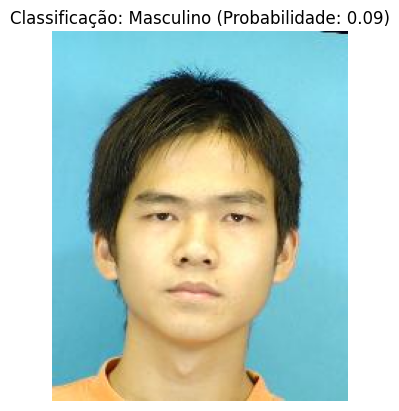

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


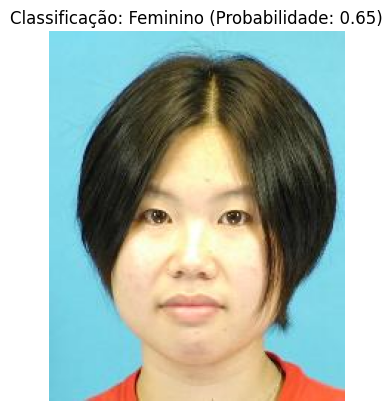

In [ ]:
# Defina corretamente os caminhos das imagens
image_paths = [
    'photos/m-014-01.jpg',  # Exemplo de caminho correto
    'photos/f-006-01.jpg',  # Exemplo de caminho correto
]

# Classificar as imagens
classify_images(model, image_paths)


Carregar as Imagens: Para cada caminho em image_paths, a imagem correspondente é carregada e pré-processada (normalmente redimensionada e normalizada) para garantir que o modelo possa fazer previsões corretamente.

Previsão com o Modelo: A imagem carregada é passada para o modelo através do método model.predict(). O modelo gera uma previsão, que é uma probabilidade (no caso de classificação binária, uma probabilidade entre 0 e 1).

Classificação:

O modelo retornará uma probabilidade de que a imagem seja da classe "feminino" ou "masculino".
A probabilidade é comparada com um limiar (geralmente 0,5). Se a probabilidade for maior que 0,5, o modelo classifica a imagem como "feminino", caso contrário, como "masculino".
Exibição dos Resultados: Depois de classificar a imagem, a função provavelmente mostrará a imagem junto com a previsão (masculino ou feminino), exibindo a imagem e a probabilidade com a qual foi classificada.

In [ ]:
import os

# Verificar se a pasta 'photos' contém imagens
photos_folder = "/content/photos"  # Diretório completo
files_in_photos = os.listdir(photos_folder)
print("Arquivos encontrados:", files_in_photos)


Arquivos encontrados: ['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'f1-013-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'm1-014-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm1-002-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-082-01.jpg', 'm-096-01.jpg', 'm1-031-01.jpg', 'm-058-01.jpg', 'f-027-01.jpg', 'm1-006-01.jpg', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-036-01.jpg', 'm-089-01.jpg', 'm1-034-01.jpg',

Definir o Caminho da Pasta: O caminho da pasta onde as imagens estão armazenadas é especificado. Esse caminho é crucial para acessar corretamente os arquivos na pasta.

Listar os Arquivos na Pasta: O comando utilizado lista todos os arquivos presentes na pasta especificada, o que inclui imagens e outros tipos de arquivos, se existirem. Isso permite saber exatamente o que está dentro da pasta.

Exibir os Arquivos Encontrados: Após listar os arquivos, o código exibe o conteúdo dessa lista no console. Isso fornece uma visualização imediata dos arquivos disponíveis na pasta, ajudando a verificar se tudo está correto antes de realizar qualquer operação, como carregar ou classificar as imagens.

Resultado Esperado: O objetivo é ver no console a lista de arquivos contidos na pasta, o que ajuda a confirmar se a pasta foi lida corretamente e se as imagens ou arquivos esperados estão lá.

In [ ]:
import cv2
import numpy as np

def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized / 255.0  # Normalizar para [0, 1]
    return np.expand_dims(img_normalized, axis=0)  # Adiciona uma dimensão extra para batch

# Teste para garantir que o carregamento das imagens está funcionando corretamente
image_paths = [
    '/content/photos/m-014-01.jpg',  # Substitua pelo caminho correto
    '/content/photos/f-012-01.jpg'   # Substitua pelo caminho correto
]

for path in image_paths:
    img = load_and_preprocess_image(path)
    if img is not None:
        print(f"Imagem carregada e pré-processada com sucesso: {path}")
    else:
        print(f"Falha ao carregar a imagem: {path}")


Imagem carregada e pré-processada com sucesso: /content/photos/m-014-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f-012-01.jpg


Importação de Bibliotecas:

cv2 (OpenCV) é usado para carregar e manipular imagens.
numpy é usado para manipulação de arrays, especificamente para a criação de um batch de imagens.
Função load_and_preprocess_image:

Objetivo: Carregar uma imagem, redimensioná-la para um tamanho especificado e normalizá-la (transformar os valores de pixel para a faixa [0, 1]).
Passos dentro da função:

cv2.imread(image_path): Carrega a imagem a partir do caminho fornecido (image_path). Se a imagem não puder ser carregada, o retorno é None.
cv2.resize(img, target_size): Redimensiona a imagem para o tamanho especificado (default é 250x200 pixels).
A imagem é então normalizada dividindo seus valores por 255.0, garantindo que os pixels estejam no intervalo de [0, 1] (necessário para redes neurais).
np.expand_dims(img_normalized, axis=0): Adiciona uma dimensão extra à imagem (para criar um "batch" de imagens, mesmo que seja uma única imagem), o que é necessário para alimentar o modelo de rede neural.
Teste para Verificar o Carregamento das Imagens:

image_paths: Contém a lista de caminhos das imagens que serão carregadas e processadas.
O código então percorre a lista de caminhos (image_paths), tenta carregar e pré-processar cada imagem e imprime uma mensagem de sucesso ou falha, dependendo se a imagem foi carregada corretamente ou não.

In [ ]:
def classify_images(model, image_paths):
    """Classifica as imagens usando o modelo fornecido."""
    for image_path in image_paths:
        img = load_and_preprocess_image(image_path)
        if img is not None:
            prediction = model.predict(img)
            print(f"Imagem: {image_path}, Predição: {prediction}")
        else:
            print(f"Erro ao carregar ou processar a imagem: {image_path}")

# Chamar a função de classificação
classify_images(model, image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Imagem: /content/photos/m-014-01.jpg, Predição: [[0.08746278]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Imagem: /content/photos/f-012-01.jpg, Predição: [[0.46421188]]


Função classify_images
Objetivo: A função tem como propósito classificar imagens utilizando o modelo que é passado como parâmetro.
Passos dentro da função:

Parâmetros:
model: O modelo treinado que será usado para fazer as predições.
image_paths: Uma lista com os caminhos das imagens que serão classificadas.
Processo:
A função percorre a lista image_paths (que contém os caminhos das imagens).
Para cada caminho de imagem (image_path):
A imagem é carregada e pré-processada pela função load_and_preprocess_image.
Se a imagem for carregada e processada corretamente (a variável img não for None), o modelo faz a predição sobre a imagem usando model.predict(img).
A predição é então impressa no console, juntamente com o caminho da imagem.
Caso haja erro no carregamento ou processamento da imagem, é exibida uma mensagem de erro.
2. Chamada da Função classify_images
Objetivo: A função classify_images é chamada para processar as imagens e realizar as predições.
A função é chamada com o modelo treinado (model) e a lista image_paths contendo os caminhos das imagens a serem classificadas.
O que o código faz:
O código irá:
Carregar e pré-processar as imagens (com a função load_and_preprocess_image).
Fazer a predição das imagens usando o modelo.
Imprimir os resultados da predição, incluindo o caminho da imagem e o valor da predição gerada pelo modelo.

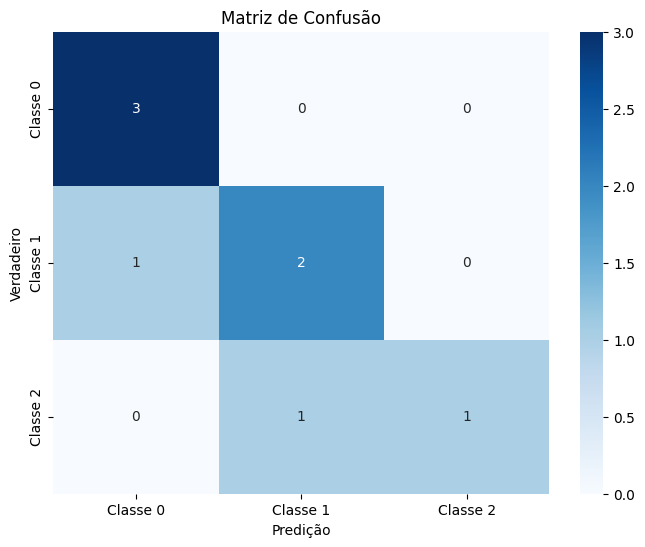

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dados de exemplo
# Substitua esses valores pelos rótulos reais e pelas predições do seu modelo
y_true = [0, 1, 1, 0, 2, 2, 1, 0]  # Rótulos reais
y_pred = [0, 1, 0, 0, 2, 1, 1, 0]  # Predições do modelo

# Classes (opcional, para rotular no gráfico)
class_names = ['Classe 0', 'Classe 1', 'Classe 2']

# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir como heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


Importação de Bibliotecas:

numpy: Usado para manipulação de arrays.
matplotlib.pyplot: Usado para criação de gráficos (neste caso, um heatmap).
seaborn: Usado para melhorar a visualização do gráfico.
sklearn.metrics: Usado para calcular a matriz de confusão e gerar a visualização.
Definição dos Dados:

y_true: Representa os rótulos reais das imagens ou exemplos de teste. Esses são os valores verdadeiros que o modelo está tentando prever.
y_pred: Representa as predições do modelo. São os valores previstos pelo modelo para os exemplos em y_true.
Neste exemplo, a lista y_true contém 8 elementos e a lista y_pred contém as predições feitas pelo modelo para esses elementos.

Definição das Classes (opcional):

class_names: Lista contendo os nomes das classes (se houver mais de duas). Neste exemplo, temos três classes: 'Classe 0', 'Classe 1' e 'Classe 2'. Esses rótulos serão usados para nomear as linhas e colunas na matriz de confusão.
Cálculo da Matriz de Confusão:

A função confusion_matrix(y_true, y_pred) calcula a matriz de confusão, que mostra quantas vezes o modelo previu corretamente ou incorretamente cada classe. A matriz será uma tabela quadrada onde:
As linhas representam os rótulos verdadeiros (y_true).
As colunas representam as predições feitas pelo modelo (y_pred).
Exibição da Matriz de Confusão com Heatmap:

A função sns.heatmap() cria um gráfico de calor (heatmap) da matriz de confusão. As opções dentro dessa função ajudam a melhorar a visualização:
annot=True adiciona os valores dentro de cada célula.
fmt='d' especifica que os valores na matriz devem ser formatados como números inteiros.
cmap='Blues' define a paleta de cores para o heatmap.
xticklabels=class_names e yticklabels=class_names usam os nomes das classes para rotular as colunas e linhas da matriz.
plt.xlabel() e plt.ylabel() adicionam os rótulos aos eixos X e Y.
plt.title() adiciona um título ao gráfico.
plt.show() exibe o gráfico.

In [ ]:
import cv2

def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized / 255.0  # Normalizar para [0, 1]
    return np.expand_dims(img_normalized, axis=0)  # Adiciona uma dimensão extra para batch


A função carrega a imagem do caminho fornecido.
Redimensiona a imagem para o tamanho desejado (por padrão, 250x200).
Normaliza os valores dos pixels para o intervalo [0, 1].
Adiciona uma dimensão extra para que a imagem possa ser utilizada em um modelo de aprendizado de máquina.

In [ ]:
def classify_images(model, image_folder, target_size=(250, 200)):
    """
    Carrega imagens de uma pasta, aplica pré-processamento e classifica usando o modelo treinado.

    Args:
        model: Modelo treinado.
        image_folder: Caminho para a pasta contendo as imagens.
        target_size: Tamanho esperado das imagens.

    Returns:
        dict: Um dicionário com os nomes das imagens e suas respectivas classificações.
    """
    classifications = {}
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.jpeg', '.jpg')):  # Verifica as extensões suportadas
            img_path = os.path.join(image_folder, filename)

            # Carregar a imagem
            img = cv2.imread(img_path)

            if img is not None:
                # Redimensionar e normalizar
                img_resized = cv2.resize(img, target_size)
                img_normalized = img_resized / 255.0
                img_input = np.expand_dims(img_normalized, axis=0)  # Adicionar dimensão batch

                # Realizar a previsão
                prediction = model.predict(img_input)[0][0]
                classification = "Feminino" if prediction > 0.5 else "Masculino"

                # Armazenar o resultado
                classifications[filename] = {
                    "Classificação": classification,
                    "Confiança": prediction
                }

    return classifications


Objetivo da Função:
A função classify_images carrega imagens de uma pasta, aplica pré-processamento nelas e classifica usando um modelo treinado.

Parâmetros:

model: O modelo treinado para realizar as previsões.
image_folder: Caminho da pasta com as imagens a serem classificadas.
target_size: Tamanho desejado para as imagens (por padrão, 250x200).
Inicialização do Dicionário:
Um dicionário classifications é criado para armazenar os resultados das previsões (classificação e confiança) para cada imagem.

Iteração pelas Imagens:
A função percorre todos os arquivos na pasta fornecida, verificando se são imagens com as extensões .jpeg ou .jpg.

Carregamento e Pré-processamento da Imagem:
Para cada imagem:

A imagem é carregada usando cv2.imread.
É redimensionada para o tamanho especificado (target_size).
Normalizada para o intervalo [0, 1] dividindo os valores dos pixels por 255.
Uma dimensão extra é adicionada para representar o batch de imagens.
Previsão da Imagem:
A imagem pré-processada é passada para o modelo usando model.predict(), que retorna a probabilidade de a imagem ser classificada como "Feminino".

Classificação:
Se a probabilidade for maior que 0.5, a classificação é "Feminino". Caso contrário, é "Masculino".

Armazenamento dos Resultados:
Os resultados (classificação e confiança) são armazenados no dicionário classifications usando o nome da imagem como chave.

Retorno:
A função retorna o dicionário classifications com as classificações e probabilidades das imagens processadas.

In [ ]:
import os

# Verificar se as pastas estão corretamente estruturadas
print("Conteúdo da pasta 'train':", os.listdir('/content/photos/train'))
print("Conteúdo da pasta 'test':", os.listdir('/content/photos/test'))

# Verificar o conteúdo das subpastas
print("Conteúdo da pasta 'train/masculino':", os.listdir('/content/photos/train/masculino'))
print("Conteúdo da pasta 'train/feminino':", os.listdir('/content/photos/train/feminino'))
print("Conteúdo da pasta 'test/masculino':", os.listdir('/content/photos/test/masculino'))
print("Conteúdo da pasta 'test/feminino':", os.listdir('/content/photos/test/feminino'))


Conteúdo da pasta 'train': ['f-020-01.jpg', 'f-016-01.jpg', 'm1-021-01.jpg', 'm-021-01.jpg', 'm-009-01.jpg', 'm-045-01.jpg', 'm-074-01.jpg', 'm-076-01.jpg', 'f1-011-01.jpg', 'masculino', 'm1-022-01.jpg', 'f1-009-01.jpg', 'f-017-01.jpg', 'm-055-01.jpg', 'm-031-01.jpg', 'm-093-01.jpg', 'm-037-01.jpg', 'f-007-01.jpg', 'm-094-01.jpg', 'm1-011-01.jpg', 'm-044-01.jpg', 'f-015-01.jpg', 'm-081-01.jpg', 'f-022-01.jpg', 'm-090-01.jpg', 'f-032-01.jpg', 'm-030-01.jpg', 'm-026-01.jpg', 'f1-014-01.jpg', 'f-012-01.jpg', 'f-010-01.jpg', 'm-028-01.jpg', 'm-010-01.jpg', 'f1-008-01.jpg', 'm-100-01.jpg', 'm-099-01.jpg', 'f-034-01.jpg', 'm1-007-01.jpg', 'm-068-01.jpg', 'm-018-01.jpg', 'm1-005-01.jpg', 'm1-027-01.jpg', 'm1-018-01.jpg', 'm1-033-01.jpg', 'm-096-01.jpg', 'm-058-01.jpg', 'feminino', 'm-095-01.jpg', 'f-026-01.jpg', 'f-037-01.jpg', 'm-069-01.jpg', 'm-091-01.jpg', 'm-089-01.jpg', 'f-011-01.jpg', 'm1-026-01.jpg', 'm-032-01.jpg', 'm-041-01.jpg', 'm1-041-01.jpg', 'm1-028-01.jpg', 'm1-037-01.jpg', 'f-

Objetivo do Código:
Este código tem como objetivo verificar se as pastas e subpastas para treino e teste estão corretamente estruturadas e se as imagens estão devidamente organizadas nelas. Ele imprime o conteúdo das pastas e subpastas para que você possa confirmar que tudo está no lugar certo.

Verificar a Estrutura das Pastas train e test:
As duas primeiras linhas de código verificam e imprimem o conteúdo das pastas principais:

train: Pasta onde as imagens de treinamento estão armazenadas.
test: Pasta onde as imagens de teste estão armazenadas.Verificar a Estrutura das Subpastas masculino e feminino:
As próximas linhas de código verificam o conteúdo das subpastas dentro de train e test. Essas subpastas representam as classes "masculino" e "feminino", onde as imagens são organizadas.

train/masculino: Imagens de treino da classe "masculino".
train/feminino: Imagens de treino da classe "feminino".
test/masculino: Imagens de teste da classe "masculino".
test/feminino: Imagens de teste da classe "feminino".

In [141]:
import os
import shutil

def reorganize_images(source_folder, dest_folder):
    """Reorganiza as imagens em subpastas 'masculino' e 'feminino'."""
    male_folder = os.path.join(dest_folder, 'masculino')
    female_folder = os.path.join(dest_folder, 'feminino')

    # Criar pastas masculinas e femininas
    os.makedirs(male_folder, exist_ok=True)
    os.makedirs(female_folder, exist_ok=True)

    # Mover as imagens para as subpastas apropriadas
    for filename in os.listdir(source_folder):
        if filename.lower().startswith('m'):  # Para masculino
            shutil.move(os.path.join(source_folder, filename), os.path.join(male_folder, filename))
        elif filename.lower().startswith('f'):  # Para feminino
            shutil.move(os.path.join(source_folder, filename), os.path.join(female_folder, filename))

# Organizar imagens para treinamento e teste
source_folder = '/content/photos'
train_folder = '/content/photos/train'
test_folder = '/content/photos/test'

# Reorganizar imagens para treino e teste
reorganize_images(source_folder, train_folder)
reorganize_images(source_folder, test_folder)


Criação de subpastas:
A função começa criando duas subpastas dentro do diretório de destino (dest_folder), uma chamada 'masculino' e outra chamada 'feminino'. Caso essas pastas já existam, a função não fará nada devido ao parâmetro exist_ok=True da função os.makedirs().A função reorganize_images é chamada duas vezes no código:

Uma vez para reorganizar as imagens dentro da pasta de treinamento (train_folder).
Outra vez para reorganizar as imagens dentro da pasta de teste (test_folder).
As imagens da pasta source_folder (que contém todas as imagens) são movidas para as subpastas de treinamento (train_folder/masculino e train_folder/feminino) ou de teste (test_folder/masculino e test_folder/feminino), dependendo da chamada da função

In [ ]:
import os
import shutil
import random

def create_directories(base_path):
    """Cria as pastas necessárias para treino e teste."""
    for subdir in ['train/masculino', 'train/feminino', 'test/masculino', 'test/feminino']:
        os.makedirs(os.path.join(base_path, subdir), exist_ok=True)

def move_images(source_folder, target_folder, train_ratio=0.8):
    """Move as imagens para as pastas de treino e teste com base no nome da imagem."""
    # Listar todas as imagens no diretório de origem
    all_images = os.listdir(source_folder)

    # Separar imagens masculinas e femininas
    male_images = [img for img in all_images if img.lower().startswith('m')]
    female_images = [img for img in all_images if img.lower().startswith('f')]

    # Dividir as imagens aleatoriamente em treino e teste
    random.shuffle(male_images)
    random.shuffle(female_images)

    # Calcular o número de imagens para treino e teste
    male_train_count = int(len(male_images) * train_ratio)
    female_train_count = int(len(female_images) * train_ratio)

    # Dividir as imagens masculinas e femininas
    male_train = male_images[:male_train_count]
    male_test = male_images[male_train_count:]

    female_train = female_images[:female_train_count]
    female_test = female_images[female_train_count:]

    # Mover as imagens para as pastas de treino e teste
    for img in male_train:
        shutil.move(os.path.join(source_folder, img), os.path.join(target_folder, 'train/masculino', img))
    for img in female_train:
        shutil.move(os.path.join(source_folder, img), os.path.join(target_folder, 'train/feminino', img))

    for img in male_test:
        shutil.move(os.path.join(source_folder, img), os.path.join(target_folder, 'test/masculino', img))
    for img in female_test:
        shutil.move(os.path.join(source_folder, img), os.path.join(target_folder, 'test/feminino', img))

# Defina o caminho do diretório das imagens
photos_folder = '/content/photos'

# Crie as pastas necessárias
create_directories(photos_folder)

# Movimente as imagens para as pastas de treino e teste
move_images(photos_folder, photos_folder)


Objetivo: Criar as pastas necessárias para o treinamento e teste das imagens, divididas em subpastas de "masculino" e "feminino".
Passos:
A função cria as seguintes subpastas dentro do diretório base_path:
train/masculino
train/feminino
test/masculino
test/feminino
Caso as pastas já existam, o parâmetro exist_ok=True faz com que o comando os.makedirs() não gere erro e continue a execução do código.Objetivo: Mover as imagens de uma pasta de origem para as subpastas de "treinamento" e "teste", dividindo as imagens com base no nome e criando uma separação entre as imagens de treino e teste.
Passos:
Listagem das Imagens: A função começa listando todas as imagens presentes no diretório source_folder (que é a pasta de origem).
Classificação das Imagens: As imagens são separadas em duas listas:
male_images: Contém as imagens cujo nome começa com 'm' (masculino).
female_images: Contém as imagens cujo nome começa com 'f' (feminino).
Divisão Aleatória:
O código embaralha as listas de imagens (male_images e female_images) usando random.shuffle() para garantir que a divisão entre treino e teste seja aleatória.
O número de imagens para treino é calculado com base na proporção train_ratio, que por padrão é 80% (0.8). O restante das imagens (20%) será movido para as pastas de teste.
Movimentação das Imagens:
As imagens masculinas e femininas são divididas entre as pastas de treinamento e teste e movidas para as subpastas apropriadas:
As imagens de treino são movidas para as pastas train/masculino e train/feminino.
As imagens de teste são movidas para as pastas test/masculino e test/feminino.

In [ ]:
model.save('/content/cnn_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/cnn_model.h5')


In [ ]:
import os
import cv2
import numpy as np

def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Erro ao carregar a imagem: {image_path}")
        return None
    img_resized = cv2.resize(img, target_size)
    img_normalized = img_resized / 255.0  # Normalizar para [0, 1]
    return np.expand_dims(img_normalized, axis=0)  # Adiciona uma dimensão extra para batch

def get_image_paths(folder_path, valid_extensions=('jpg', 'jpeg', 'png')):
    """Obtém os caminhos de todas as imagens válidas em uma pasta."""
    return [
        os.path.join(folder_path, f) for f in os.listdir(folder_path)
        if f.lower().endswith(valid_extensions)
    ]

# Pasta contendo as imagens
folder_path = '/content/photos'

# Obter caminhos de todas as imagens válidas na pasta
image_paths = get_image_paths(folder_path)

# Garantir que a lista de imagens não está vazia
if not image_paths:
    print("Nenhuma imagem encontrada na pasta especificada.")
else:
    # Carregar e pré-processar as imagens de forma aleatória
    import random
    random.shuffle(image_paths)  # Embaralhar a ordem das imagens

    for path in image_paths:
        img = load_and_preprocess_image(path)
        if img is not None:
            print(f"Imagem carregada e pré-processada com sucesso: {path}")
        else:
            print(f"Falha ao carregar a imagem: {path}")


Imagem carregada e pré-processada com sucesso: /content/photos/f1-004-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-095-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-035-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f-024-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-016-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f1-015-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f-015-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-029-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-014-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m1-002-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-026-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f1-009-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-027-01.jpg
Imagem c

Objetivo: Carregar uma imagem de um caminho específico e pré-processá-la para uso em um modelo de aprendizado de máquina.
Passos:
Carregar a Imagem: Usando o OpenCV (cv2.imread), a imagem é carregada do caminho fornecido. Se a imagem não puder ser carregada (retorna None), uma mensagem de erro é exibida e a função retorna None.
Redimensionamento: A imagem é redimensionada para um tamanho de 250x200 pixels (tamanho padrão fornecido pelo parâmetro target_size).
Normalização: A imagem é normalizada dividindo todos os valores dos pixels por 255.0, convertendo os valores para a faixa de [0, 1].
Adicionar Dimensão de Batch: O método np.expand_dims(img_normalized, axis=0) adiciona uma dimensão extra para criar um "batch" de tamanho 1, que é necessário para a entrada de modelos de aprendizado de máquina, que geralmente esperam dados no formato de batches (mesmo que o batch tenha apenas uma imagem).

In [ ]:
# Selecionar 5 imagens aleatórias
random_images = random.sample(image_paths, min(len(image_paths), 5))

for path in random_images:
    img = load_and_preprocess_image(path)
    if img is not None:
        print(f"Imagem carregada e pré-processada com sucesso: {path}")
    else:
        print(f"Falha ao carregar a imagem: {path}")


Imagem carregada e pré-processada com sucesso: /content/photos/m-009-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m-085-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f-016-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/f1-006-01.jpg
Imagem carregada e pré-processada com sucesso: /content/photos/m1-014-01.jpg


 Seleção Aleatória de Imagens
random.sample(image_paths, min(len(image_paths), 5)):
Objetivo: Seleciona aleatoriamente até 5 imagens da lista image_paths.
random.sample: Essa função é usada para escolher aleatoriamente um número de itens de uma lista sem repetição.
min(len(image_paths), 5): Garante que não será selecionado mais do que o número total de imagens disponíveis. Se houver menos de 5 imagens, todas serão selecionadas. A função min é usada para garantir que a quantidade de imagens selecionadas não ultrapasse o número de imagens disponíveis na lista.
Resultado: A variável random_images conterá uma lista com os caminhos de 5 imagens aleatórias (ou menos, se a lista for menor que 5).
2. Processamento das Imagens
for path in random_images::
Objetivo: Iterar sobre cada caminho de imagem aleatória da lista random_images.
Ação: Para cada caminho (path), o código tenta carregar e pré-processar a imagem usando a função load_and_preprocess_image.
3. Carregar e Pré-processar as Imagens
img = load_and_preprocess_image(path):
Objetivo: Chama a função load_and_preprocess_image para carregar e pré-processar a imagem no caminho especificado por path.
A função load_and_preprocess_image:
Carrega a imagem usando OpenCV (cv2.imread).
Redimensiona a imagem para o tamanho especificado.
Normaliza os valores dos pixels para o intervalo [0, 1].
Adiciona uma dimensão extra para formar um "batch" de tamanho 1.
4. Verificação do Status de Carregamento
if img is not None::
Objetivo: Verificar se a imagem foi carregada e pré-processada com sucesso.
Se a imagem foi carregada e processada corretamente (não é None), uma mensagem de sucesso será impressa, informando o caminho da imagem.
else::
Se ocorrer um erro ao carregar ou processar a imagem, uma mensagem de falha será impressa.
5. Exemplo de Fluxo do Código:
Passo 1: Se a pasta image_paths contiver 10 imagens e você selecionar 5 imagens aleatórias, o código irá:
Escolher aleatoriamente 5 imagens da pasta (ou menos, se houver menos de 5 imagens).
Para cada imagem selecionada, tentará carregar e pré-processar a imagem.
Para cada imagem processada com sucesso, imprimirá uma mensagem dizendo "Imagem carregada e pré-processada com sucesso: {caminho da imagem}".
Para qualquer falha no carregamento ou processamento, imprimirá uma mensagem de erro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


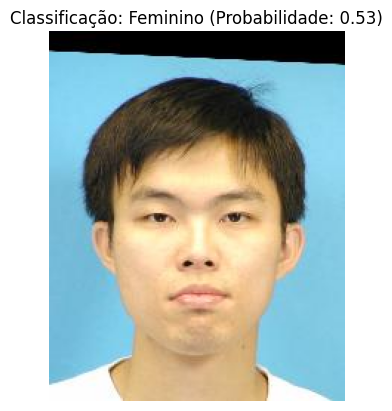

In [140]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Função para carregar e pré-processar a imagem
def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Converte a imagem para um array NumPy
    img_array = img_array / 255.0  # Normaliza a imagem para [0, 1] - mesmo que foi feito no treinamento
    return np.expand_dims(img_array, axis=0)  # Adiciona a dimensão de batch

# Função para classificar e exibir a imagem
def classify_and_display_image(model, image_path):
    """Classifica uma imagem e a exibe com a classificação."""
    # Carregar e pré-processar a imagem
    img = load_and_preprocess_image(image_path)

    # Fazer a previsão
    prediction = model.predict(img)

    # Usar a probabilidade para determinar a classificação (threshold 0.5)
    if prediction[0] > 0.5:
        label = 'Feminino'
    else:
        label = 'Masculino'

    # Exibir a imagem
    img_display = cv2.imread(image_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)  # Converter para RGB para exibição
    plt.imshow(img_display)
    plt.title(f"Classificação: {label} (Probabilidade: {prediction[0][0]:.2f})")
    plt.axis('off')
    plt.show()

# Função para selecionar uma imagem aleatória da pasta de teste
def get_random_image_from_folder(folder_path):
    """Retorna o caminho de uma imagem aleatória de uma pasta."""
    all_images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    random_image = random.choice(all_images)  # Escolher uma imagem aleatória
    return os.path.join(folder_path, random_image)

# Caminho para a pasta de teste (substitua conforme sua estrutura)
test_folder = '/content/photos/test/'  # Ajuste o caminho conforme sua pasta

# Selecionar uma imagem aleatória da pasta de teste
random_image_path = get_random_image_from_folder(test_folder)

# Classificar e exibir a imagem aleatória
classify_and_display_image(model, random_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


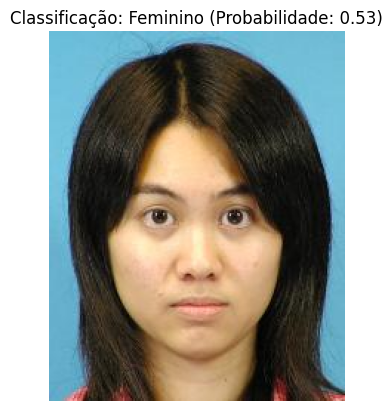

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Função para carregar e pré-processar a imagem
def load_and_preprocess_image(image_path, target_size=(250, 200)):
    """Carrega e pré-processa uma única imagem."""
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)  # Converte a imagem para um array NumPy
    img_array = img_array / 255.0  # Normaliza a imagem para [0, 1]
    return np.expand_dims(img_array, axis=0)  # Adiciona a dimensão de batch

# Função para classificar e exibir a imagem
def classify_and_display_image(model, image_path):
    """Classifica uma imagem e a exibe com a classificação."""
    # Carregar e pré-processar a imagem
    img = load_and_preprocess_image(image_path)

    # Fazer a previsão
    prediction = model.predict(img)
    label = 'Feminino' if prediction > 0.5 else 'Masculino'

    # Exibir a imagem
    img_display = cv2.imread(image_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)  # Converter para RGB para exibição
    plt.imshow(img_display)
    plt.title(f"Classificação: {label} (Probabilidade: {prediction[0][0]:.2f})")
    plt.axis('off')
    plt.show()

# Função para selecionar uma imagem aleatória da pasta de teste
def get_random_image_from_folder(folder_path):
    """Retorna o caminho de uma imagem aleatória de uma pasta."""
    all_images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    random_image = random.choice(all_images)  # Escolher uma imagem aleatória
    return os.path.join(folder_path, random_image)

# Caminho para a pasta de teste (substitua conforme sua estrutura)
test_folder = '/content/photos/test/'

# Selecionar uma imagem aleatória da pasta de teste
random_image_path = get_random_image_from_folder(test_folder)

# Classificar e exibir a imagem aleatória
classify_and_display_image(model, random_image_path)


In [ ]:
import os
import shutil
import random

def create_directories(base_path):
    """Cria as pastas necessárias para treino e teste."""
    for subdir in ['train/masculino', 'train/feminino', 'test/masculino', 'test/feminino']:
        os.makedirs(os.path.join(base_path, subdir), exist_ok=True)

def move_images(source_folder, target_folder, train_ratio=0.8):
    """Move as imagens para as pastas de treino e teste com base no nome da imagem."""
    # Listar todas as imagens no diretório de origem
    all_images = os.listdir(source_folder)

    # Separar imagens masculinas e femininas
    male_images = [img for img in all_images if img.lower().startswith('m')]
    female_images = [img for img in all_images if img.lower().startswith('f')]

    # Verificação para depuração
    print(f"Imagens masculinas encontradas: {male_images}")
    print(f"Imagens femininas encontradas: {female_images}")

    # Dividir as imagens aleatoriamente em treino e teste
    random.shuffle(male_images)
    random.shuffle(female_images)

    # Calcular o número de imagens para treino e teste
    male_train_count = int(len(male_images) * train_ratio)
    female_train_count = int(len(female_images) * train_ratio)

    # Dividir as imagens masculinas e femininas
    male_train = male_images[:male_train_count]
    male_test = male_images[male_train_count:]

    female_train = female_images[:female_train_count]
    female_test = female_images[female_train_count:]

    # Mover as imagens para as pastas de treino e teste
    for img in male_train:
        shutil.move(os.path.join(source_folder, img), os.path.join(target_folder, 'train/masculino', img))
    for img in female_train:
        shutil.move(os.path.join(source_folder, img), os.path.join(target_folder, 'train/feminino', img))


In [ ]:
import os

# Caminho para a pasta de teste
test_folder = '/content/photos/test/masculino'  # Pode ser também a pasta 'feminino'

# Listar todas as imagens na pasta
test_images = os.listdir(test_folder)

# Classificar cada imagem
for img_name in test_images:
    img_path = os.path.join(test_folder, img_name)
    print(f"Classificando a imagem: {img_name}")
    label, confidence = classify_image(model, img_path)
    print(f"Resultado: {label} com confiança de {confidence:.2f}%\n")
